# Choosing a classification algorithm

...

# First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

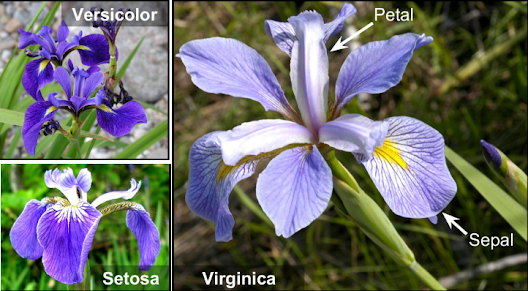

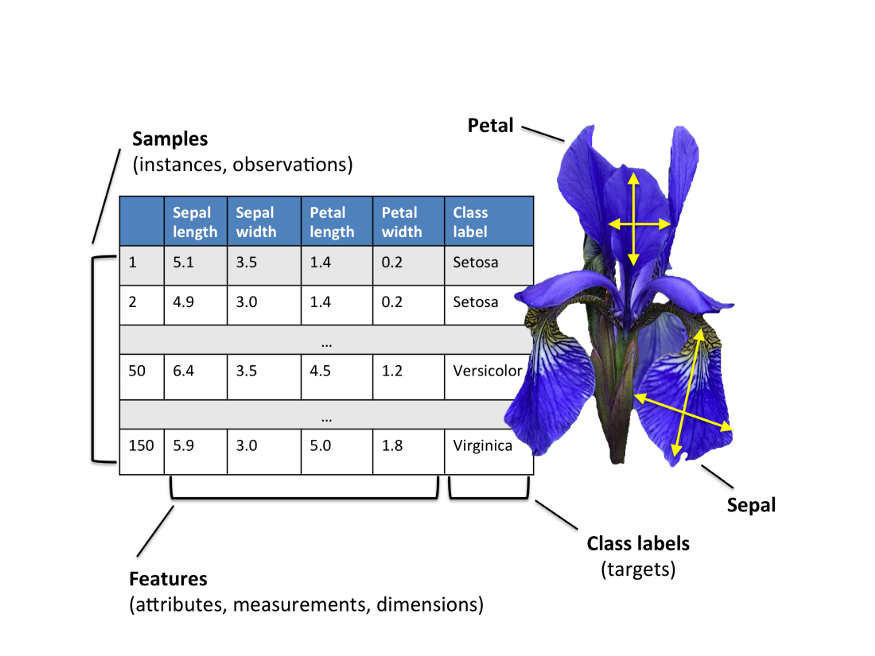


Splitting data into 80% training and 20% test data:

In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
# Step 1: Read and Load Data
# The Iris dataset is available in scikit-learn, but we can load it from the UCI Machine Learning Repository.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, names=column_names)

In [41]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


c:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

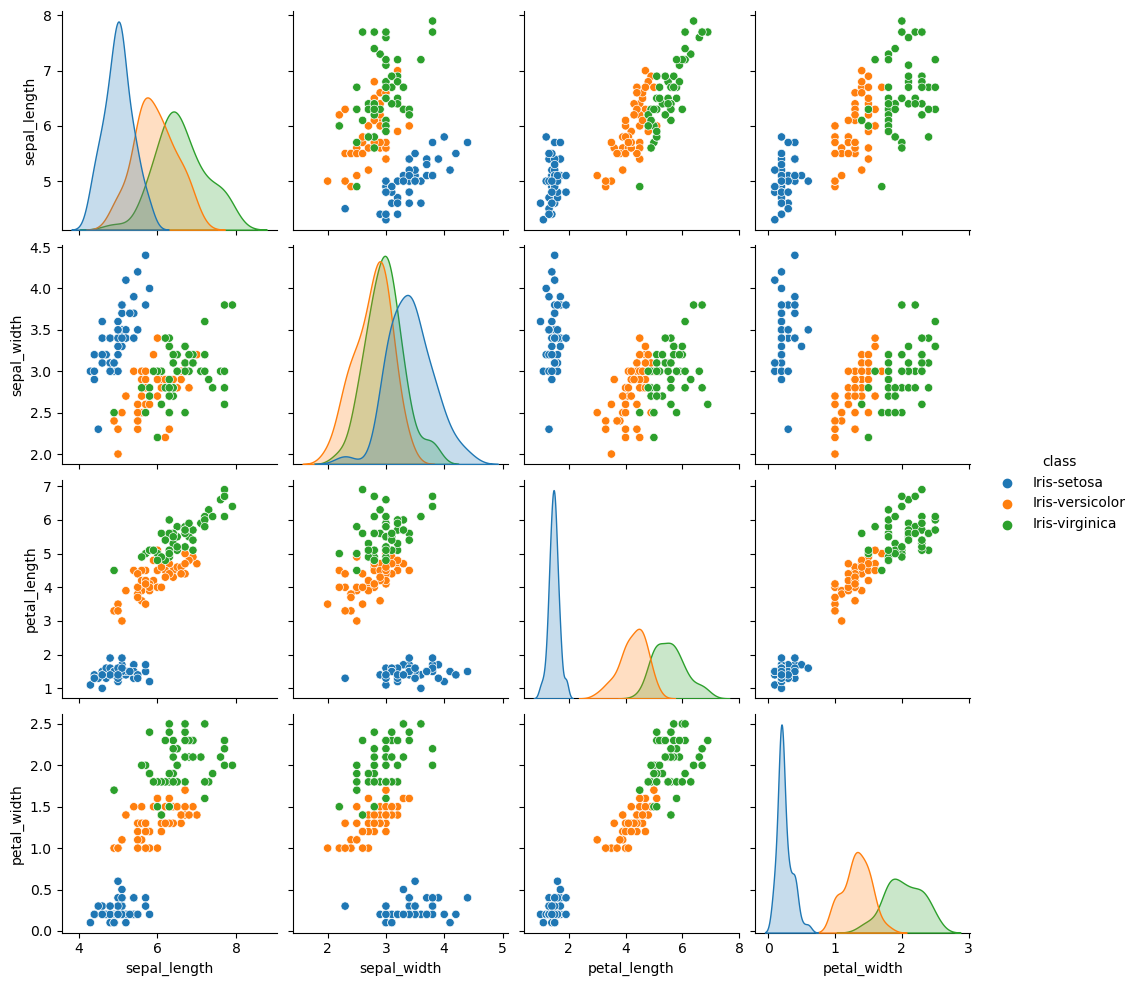

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a pairplot
sns.pairplot(data, hue="class")
plt.show()

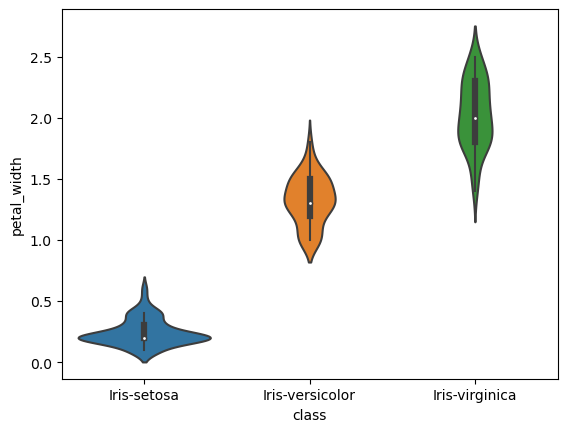

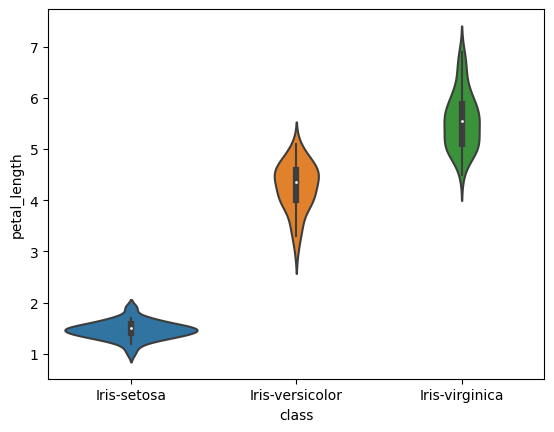

In [43]:
# Create a violin plot same as boxplot to check if there are outliers
sns.violinplot(x="class", y="petal_width", data=data)

plt.show()
sns.violinplot(x="class", y="petal_length", data=data)
plt.show()

In [44]:
# Display the first few rows of the dataset
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


<Axes: xlabel='class', ylabel='count'>

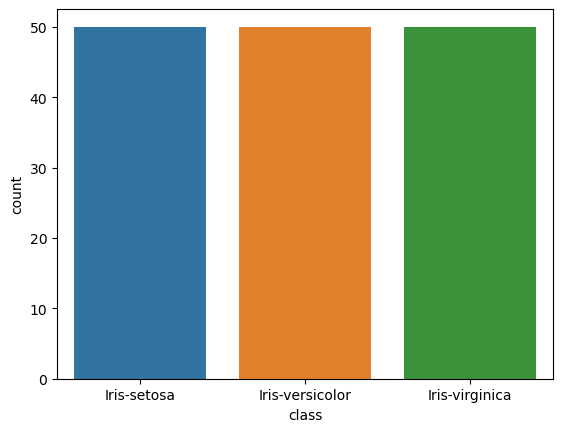

In [45]:
# make sure the classes are balanced
sns.countplot(data = data, x = "class")

Standardizing the features:

In [46]:
# Step 2: Preprocess Data
# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]  # Features: sepal_length, sepal_width, petal_length, petal_width
y = data['class']      # Target: Iris class


In [47]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
y_train

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: class, Length: 120, dtype: object

In [50]:
# Standardize the features by scaling because pedal_width << sepal_width and pedal_length << sepal_width
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
type(y_train)

pandas.core.series.Series

### Decision Tree Classifier

In [52]:
DTC = DecisionTreeClassifier(criterion = "entropy",max_depth=2)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

#### Results

In [53]:
# Step 4: Make Predictions
y_pred = DTC.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.67%


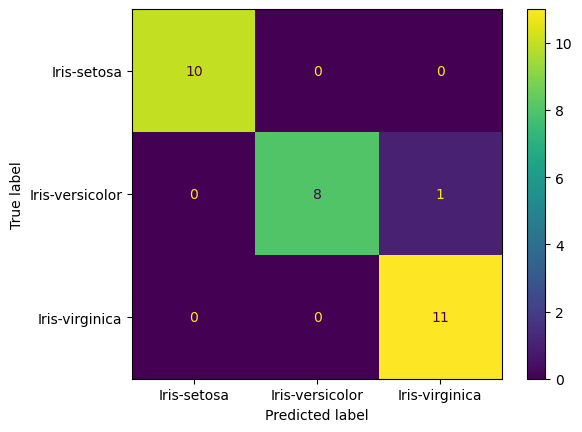

In [54]:
cm = confusion_matrix(y_test, y_pred, labels=DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DTC.classes_)
disp.plot()
plt.show()

### Random Forest Classifier

In [55]:
# n_estimators is the number of tree ensambles
RFC = RandomForestClassifier(n_estimators=10, max_depth = 2,random_state=42)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

In [56]:
# Step 4: Make Predictions
y_pred = RFC.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


#### Results

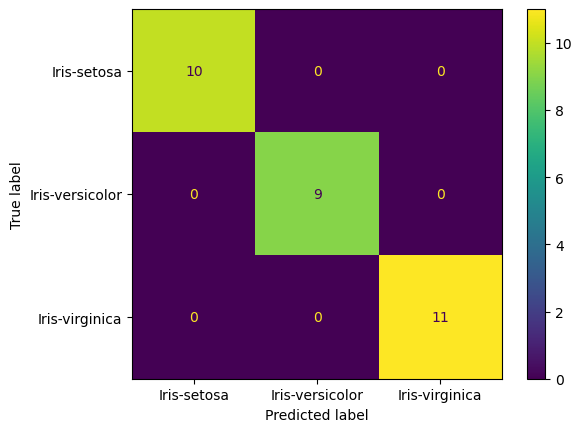

In [57]:
cm = confusion_matrix(y_test, y_pred, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
plt.show()

### KNeighbors Classifier

In [58]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

#### Results

In [59]:
y_pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


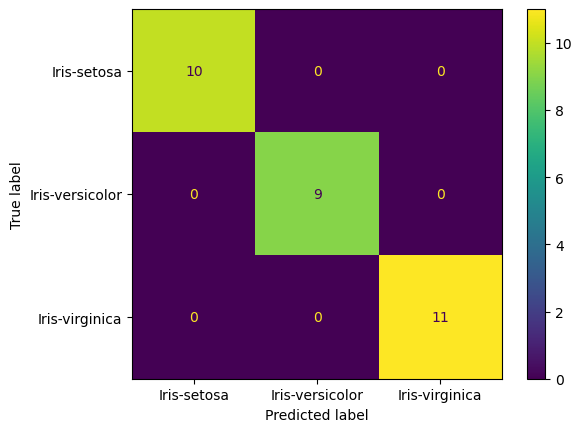

In [60]:
cm = confusion_matrix(y_test, y_pred, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot()
plt.show()

Best K: 1, Accuracy: 100.00%


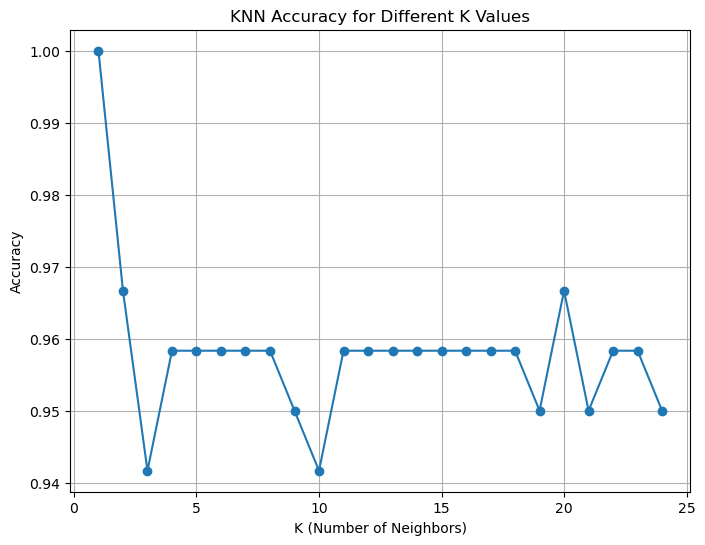

In [61]:
# choosing the best k value 
k_values = list(range(1, 25))
accuracies = []
best_k = 0
best_accuracy = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    accuracy = accuracy_score(y_train,y_pred)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best K: {best_k}, Accuracy: {best_accuracy * 100:.2f}%")

# Plot the accuracy for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Best K: 3, Accuracy: 95.00%


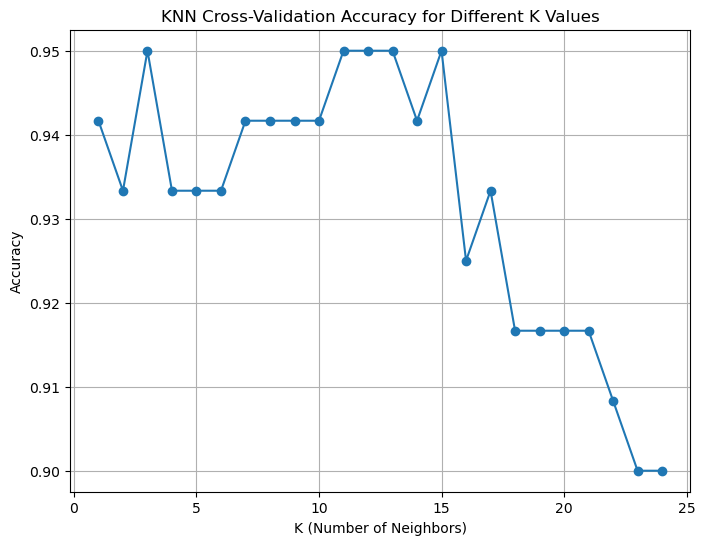

In [62]:
k_values = list(range(1, 25))
cross_val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cross validation if data in sequence, result the model no overfitting or no sequence (only pattern)
    scores = cross_val_score(knn,X_train, y_train, cv=5)  # Using 5-fold cross-validation
    cross_val_accuracies.append(scores.mean())

# Find the best K value
best_k = k_values[cross_val_accuracies.index(max(cross_val_accuracies))]
best_accuracy = max(cross_val_accuracies)

print(f"Best K: {best_k}, Accuracy: {best_accuracy * 100:.2f}%")

# Plot the cross-validation accuracy for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, cross_val_accuracies, marker='o', linestyle='-')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
